# Load Libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics # for evaluation
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", names=col_names, skiprows=1)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Feature Selection

> You should use SQL to achieve this in lab4

In [3]:
# split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

# Splitting Data

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Building Decision Tree Model

In [5]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluating the Model

In [6]:
# Model Accuracy, how often is the classifier correct?
base_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", base_acc)

Accuracy: 0.670995670995671


In [7]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[113  33]
 [ 43  42]]


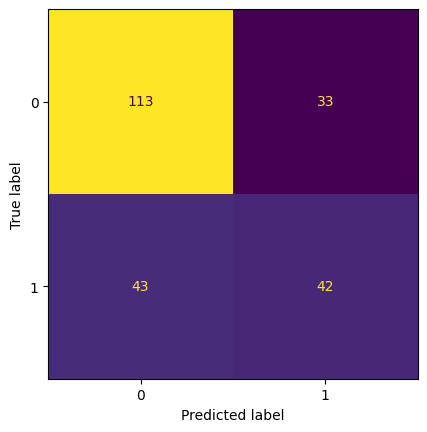

In [8]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clf.classes_, colorbar=False)

# Plot Tree

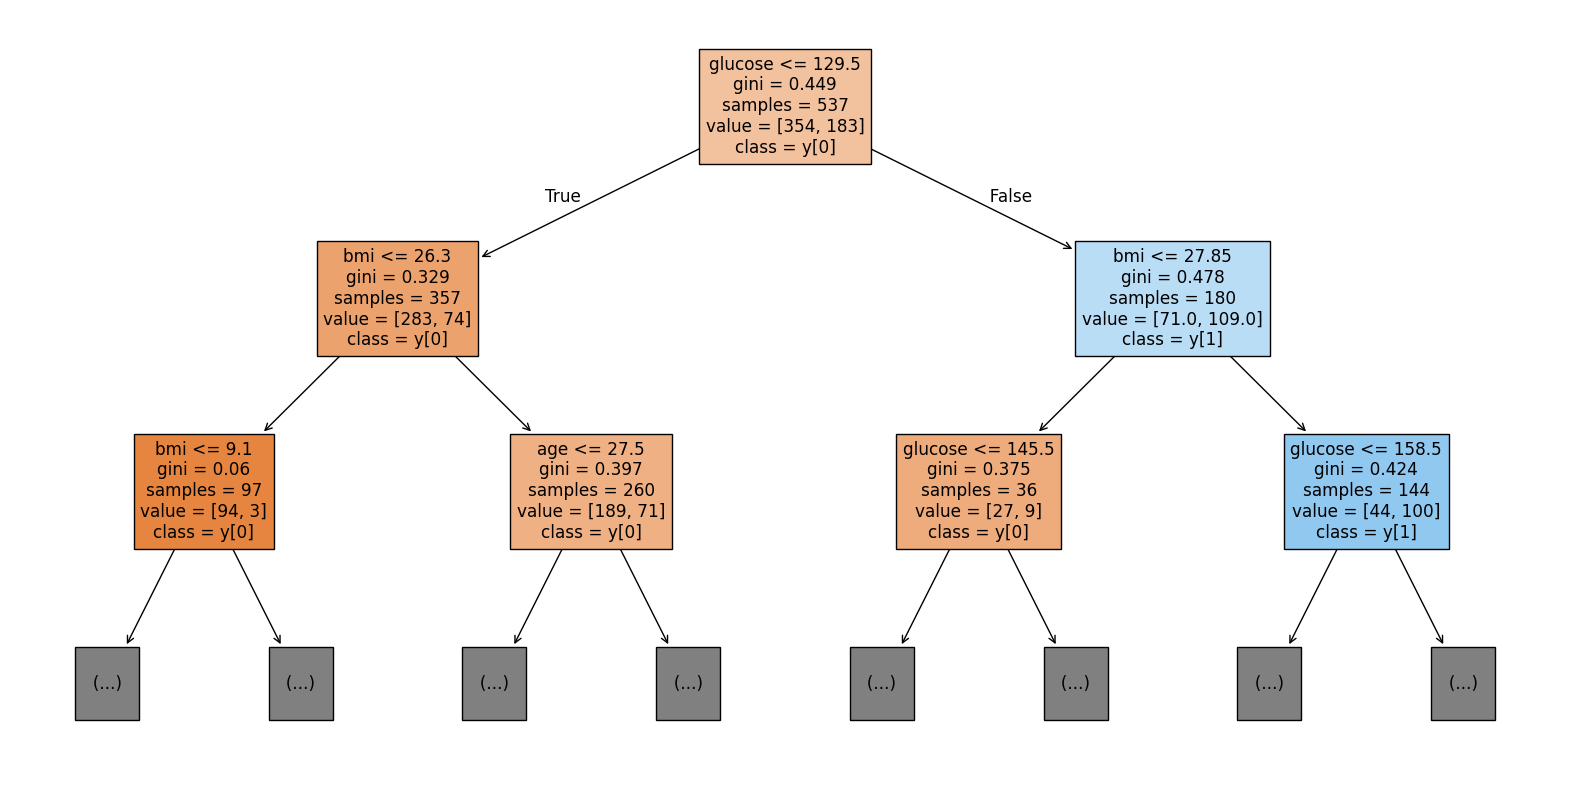

In [9]:
_, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf, feature_names=feature_cols, class_names=True, filled=True, max_depth=2, ax=ax);
# ^ In jupyter-lab, you can use a semicolon (;) to suppress unwanted textual output
# max_depth is set to 2 so that the figure is readable

# Tuning Hyperparameters

In [10]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=10)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf2.predict(X_test)

In [11]:
# Model Accuracy, how often is the classifier correct?
new_acc = metrics.accuracy_score(y_test, y_pred)
print("Base Accuracy:", base_acc)
print("New Accuracy: ", new_acc)

Base Accuracy: 0.670995670995671
New Accuracy:  0.7575757575757576


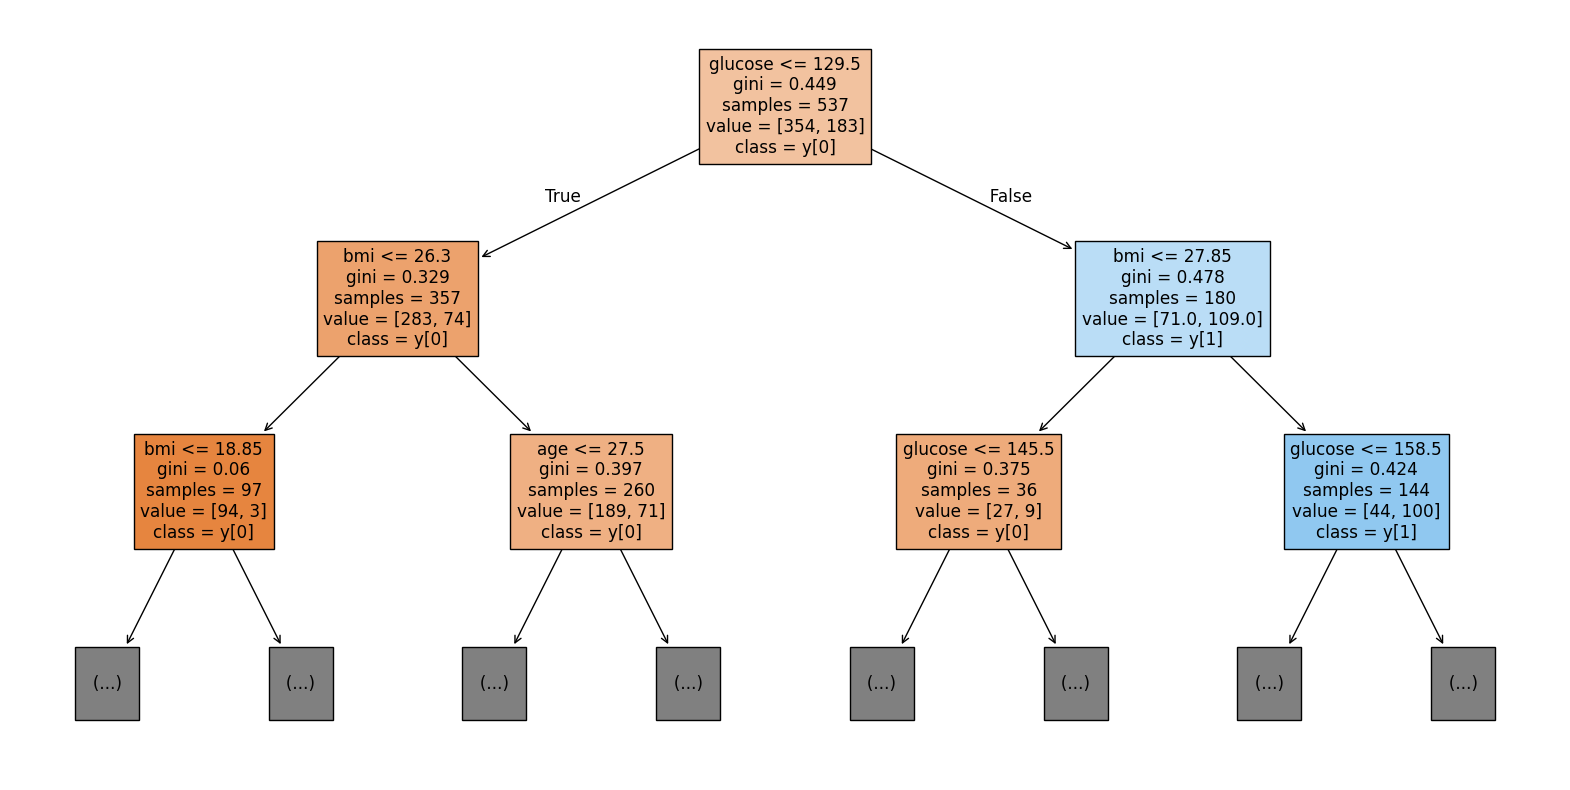

In [12]:
_, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf2, feature_names=feature_cols, class_names=True, filled=True, max_depth=2, ax=ax);
# ^ In jupyter-lab, you can use a semicolon (;) to suppress unwanted textual output
# max_depth is set to 2 so that the figure is readable